## Detecting Fake News

### Objective:
#### Differentiate between real and fake news using a Python project applying a PassiveAggressiveClassifier.

### Tasks:

####  1) Read and explore the textual dataset.
#### 2)  Build a machine learning model with TfidfVectorizer and PassiveAggressiveClassifier.
####  3) Create a confusion matrix to evaluate the model's performance.
####  4) Measure the model's accuracy.

### Deliverables:

#### 1) Report on detecting fake news using Python, covering data exploration, model building, and evaluation.
#### 2) Python code for data preprocessing, model construction, and confusion matrix generation.

### Task 1: Imports and data loading

#### Import the data and packages that required for Model construction.

In [1]:
# Packages for data preprocessing and manipulation
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for building Machine Learning Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report,accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import itertools


In [2]:
# Load the dataset by running this cell

news_df = pd.read_csv('news.csv')

###  Task 2: Explore data with Exploratory Data Analysis
#### Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.

In [3]:
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
news_df.shape

(6335, 4)

 #### news_df dataframe consist of 6335 rows and 4 columns

#### Generate summary statistics using the describe() method

In [5]:
news_df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


#### And summary information using the info() method.

In [6]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


#### There are no missing values in data

#### Now, check the class balance of the dependent (target) variable, label

In [7]:
news_df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

#### What percent of labels we have

In [8]:
round(news_df['label'].value_counts(normalize=True)*100,2)

REAL    50.06
FAKE    49.94
Name: label, dtype: float64

In [9]:
news_df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

#### We have to replace column 'Unnamed: 0' with some valid name as 'Id'

In [10]:
news_df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [11]:
news_df.head()

,Id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### Now it seems good by giving column name 'Id'

### Task 3: Model building

### Assign predictor variables and target

In [12]:
# Isolate predictor variables
X = news_df['text']

In [13]:
# Isolate target variable
Y = news_df['label']

### Split the data
#### Use scikit-learn's train_test_split() function to perform a train/test split on your data using the X and y variables you assigned above.

In [14]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.4, random_state= 7)

In [15]:
#Then we’ll initialize TfidfVectorizer with English stop words
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train) 
tfidf_test=vectorizer.transform(x_test)

#### 1. `TfidfVectorizer` is initialized with English stop words and a maximum document frequency threshold of 0.7. This vectorizer is then used to transform the training set (`x_train`) into TF-IDF features (`tfidf_train`).

#### 2. Similarly, the same vectorizer is applied to transform the test set (`x_test`) into TF-IDF features (`tfidf_test`). The `max_df` parameter is set to 0.7, indicating that words occurring in more than 70% of the documents will be ignored in the TF-IDF calculation.

In [16]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)

#### 1. A `PassiveAggressiveClassifier` is created with a maximum of 50 iterations (`max_iter` set to 50).
#### 2. The classifier is trained using the TF-IDF-transformed training data (`tfidf_train`) and corresponding labels (`y_train`).
#### 3. The trained classifier is then used to predict labels for the TF-IDF-transformed test data (`tfidf_test`), and the predictions are stored in the variable `y_pred`.

### Task 4: Show results with a confusion matrix
#### Use the confusion_matrix function to obtain a confusion matrix. Use y_test and y_preds as arguments

In [17]:
#Create a confusion matrix
cm= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
cm

array([[1186,   84],
       [  91, 1173]], dtype=int64)

#### Next, use the ConfusionMatrixDisplay() function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

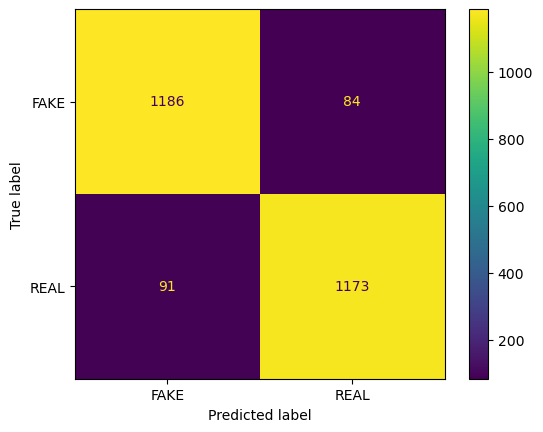

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['FAKE', 'REAL'],
                              )
disp.plot();

In [19]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.0939226519337

#### The model's accuracy is 93%

#### You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's classification_report() function to generate a table from y_test and y_preds.

In [20]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534

